<a href="https://colab.research.google.com/github/ernestojr-7/kaggle-cartao-credito-clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset do [Kaggle](https://www.kaggle.com/arjunbhasin2013/ccdata?select=CC+GENERAL.csv)

# Carregando e normalizando dados

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import pandas as pd

df = pd.read_csv("CC GENERAL.csv")
df.drop(columns=["CUST_ID", "TENURE"], inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [36]:
missing = df.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [37]:
df.fillna(df.median(), inplace=True)
missing = df.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [38]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(df.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

# Métricas de clustering

In [40]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.34863613824758777


In [41]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.1526565665992343


In [42]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3422.84313388048


# Comparando com dados aleatórios

In [43]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [44]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.32724464582661594 1.3093507662143313 3526.4668344515403


In [45]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.36456494774967113 1.0760121333619623 3431.782988203447


In [46]:
s3, dbs3, calinski3 = clustering_algorithm(50, values)
print(s3, dbs3, calinski3)

0.2413039855051594 1.2136869005322777 1618.582013649032


In [47]:
# comparando com dados aleatorios
import numpy as np
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.039626441804216594 3.5215121661803424 302.7324700845174
0.36456494774967113 1.0760121333619623 3431.782988203447


In [48]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.3689709458416189 1.0581656052369075 1204.0560966145404
0.35406999696241026 1.1389554530299946 1194.945411949724
0.36693618541895895 1.0992770838399704 1167.53240125158


# Vizualização

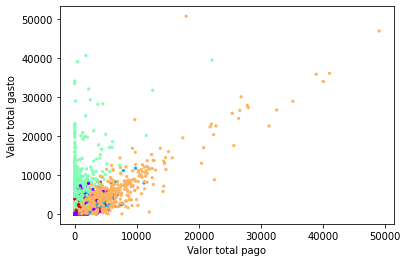

In [58]:
import matplotlib.pyplot as plt
plt.scatter(df['PURCHASES'], df['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")
plt.show(); 

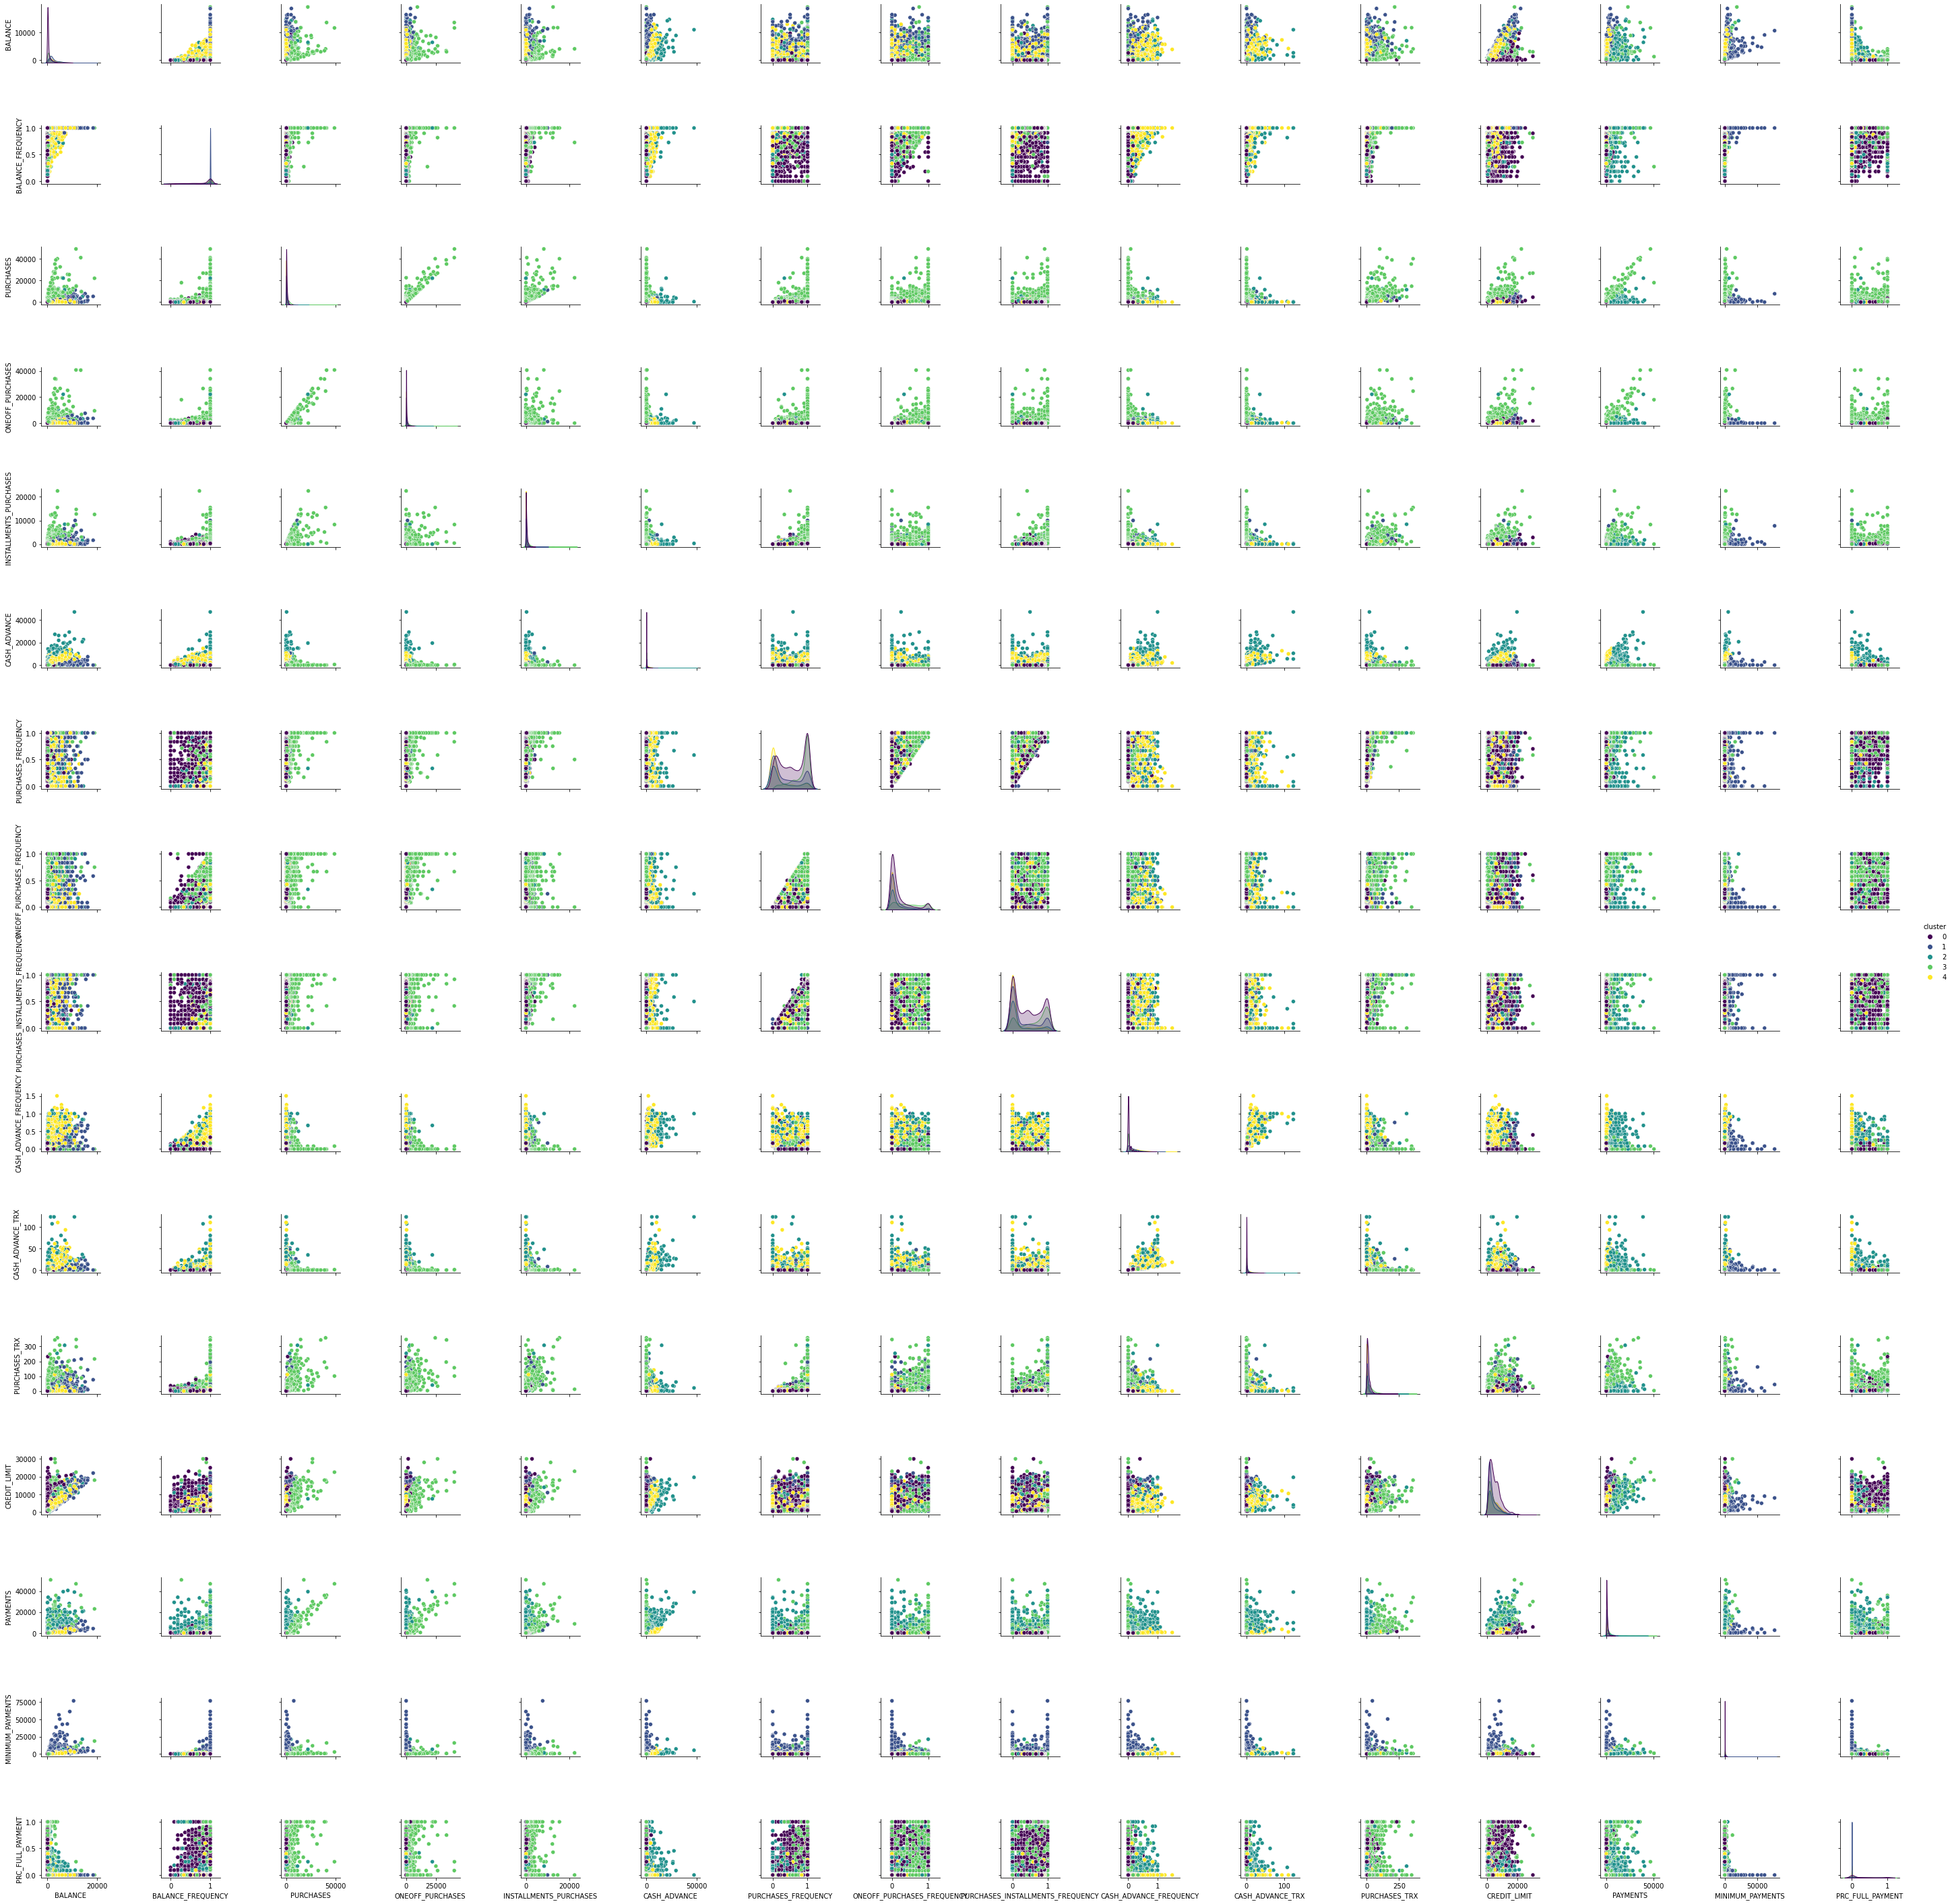

In [76]:
import seaborn as sns
df["cluster"] = labels
sns.pairplot(df[0:], hue="cluster", palette="viridis");

# Agrupando colunas mais relevantes

In [61]:
df.groupby("cluster").describe()

BALANCE                            ... PRC_FULL_PAYMENT                    
          count         mean          std  ...              50%       75%       max
cluster                                    ...                                     
0        3315.0   488.802028   936.433585  ...         0.000000  0.436507  1.000000
1        1825.0  2949.582558  2565.494710  ...         0.000000  0.000000  0.416667
2        1001.0  1748.854674  1987.975020  ...         0.083333  0.166667  1.000000
3        1494.0  1118.998658  1627.007380  ...         0.083333  0.567461  1.000000
4        1315.0  2719.616192  2230.337145  ...         0.000000  0.000000  0.600000

[5 rows x 128 columns]

In [62]:
centroids = kmeans.cluster_centers_
print(centroids)

[[7.41435057e-02 2.30598606e-04 1.22644337e-01 4.91336388e-02
  7.36112623e-02 2.02012160e-02 1.72105136e-04 3.41056055e-05
  1.39398511e-04 7.56585643e-06 1.18718703e-04 2.87194118e-03
  9.43090102e-01 1.54954100e-01 5.72048927e-02 7.55013476e-05]
 [5.34687210e-01 3.07650208e-04 9.40629597e-02 4.50945616e-02
  4.90836013e-02 8.40386909e-02 1.03622694e-04 3.29090827e-05
  7.70582927e-05 3.86156491e-05 6.69712678e-04 2.24253925e-03
  6.47433252e-01 1.99966849e-01 3.11387835e-01 2.85888844e-07]
 [2.27283461e-01 2.12919599e-04 6.90552841e-02 3.82103280e-02
  3.08505405e-02 3.64415621e-01 5.84848743e-05 2.24756747e-05
  3.97948056e-05 5.90776324e-05 1.43098394e-03 1.30916105e-03
  5.19057140e-01 6.31517578e-01 1.13827521e-01 3.10899781e-05]
 [1.55441288e-01 2.45527380e-04 4.45197805e-01 2.57865614e-01
  1.87505775e-01 2.67051319e-02 2.04941957e-04 8.80988885e-05
  1.51947090e-04 9.54095447e-06 1.73998170e-04 6.18672007e-03
  5.94079088e-01 4.02613545e-01 9.25336034e-02 7.27583477e-05]
 [3.

In [63]:
c = []
l = []
max = len(centroids[0])
for i in range(max):
    print(f'{df.columns.values[i]}: {centroids[:, i].var():.4f}, ')
    l.append(centroids[:, i].var())
    c.append(df.columns.values[i])

BALANCE: 0.0276, 
BALANCE_FREQUENCY: 0.0000, 
PURCHASES: 0.0219, 
ONEOFF_PURCHASES: 0.0077, 
INSTALLMENTS_PURCHASES: 0.0037, 
CASH_ADVANCE: 0.0350, 
PURCHASES_FREQUENCY: 0.0000, 
ONEOFF_PURCHASES_FREQUENCY: 0.0000, 
PURCHASES_INSTALLMENTS_FREQUENCY: 0.0000, 
CASH_ADVANCE_FREQUENCY: 0.0000, 
CASH_ADVANCE_TRX: 0.0000, 
PURCHASES_TRX: 0.0000, 
CREDIT_LIMIT: 0.0210, 
PAYMENTS: 0.0348, 
MINIMUM_PAYMENTS: 0.0078, 
PRC_FULL_PAYMENT: 0.0000, 


In [64]:
argsort = np.argsort(l)

In [65]:
argsort

array([ 7,  9, 15,  1,  8,  6, 10, 11,  4,  3, 14, 12,  2,  0, 13,  5])

In [66]:
np.flip(argsort)

array([ 5, 13,  0,  2, 12, 14,  3,  4, 11, 10,  6,  8,  1, 15,  9,  7])

In [67]:
for i in np.flip(argsort):
    print(f'{l[i]}')

0.03504652225027224
0.03477234106577683
0.02762778115034979
0.021875213667807307
0.020961066817815132
0.007842941667657786
0.007727379222401675
0.0037214586605827465
3.5952395540523035e-06
4.2943116915697665e-07
3.890367068054872e-09
2.501956323451298e-09
1.1377995670683082e-09
1.0727490698948172e-09
7.464198631592045e-10
6.546975028804228e-10


In [68]:
for i in np.flip(argsort):
    print(f'{c[i]}')

CASH_ADVANCE
PAYMENTS
BALANCE
PURCHASES
CREDIT_LIMIT
MINIMUM_PAYMENTS
ONEOFF_PURCHASES
INSTALLMENTS_PURCHASES
PURCHASES_TRX
CASH_ADVANCE_TRX
PURCHASES_FREQUENCY
PURCHASES_INSTALLMENTS_FREQUENCY
BALANCE_FREQUENCY
PRC_FULL_PAYMENT
CASH_ADVANCE_FREQUENCY
ONEOFF_PURCHASES_FREQUENCY


In [69]:
description = df.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
cluster,,,,,,
0,488.802028,640.242015,126.097601,5178.415315,827.711487,3315
1,2949.582558,559.479945,573.495675,3730.000000,1050.324877,1825
2,1748.854674,531.250120,3064.439069,3914.956256,4961.223005,1001
3,1118.998658,3328.438133,186.010928,4044.718977,3050.885706,1494
4,2719.616192,251.530144,3004.448265,4782.091255,1008.915227,1315


# Insight


**CLUSTER 0**: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior número de clientes.

**CLUSTER 1**: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.

**CLUSTER 2**: Clientes que gastam muito com compras. Melhores pagadores.

**CLUSTER 3**: Clientes que gastam muito com saques. Pagam as vezes.

**CLUSTER 4**: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.

In [70]:
df.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,3315.0,0.244951,0.345886,0.0,0.0,0.000000,0.436507,1.000000
1,1825.0,0.001062,0.013400,0.0,0.0,0.000000,0.000000,0.416667
2,1001.0,0.129974,0.198876,0.0,0.0,0.083333,0.166667,1.000000
3,1494.0,0.282392,0.369194,0.0,0.0,0.083333,0.567461,1.000000
4,1315.0,0.007450,0.041141,0.0,0.0,0.000000,0.000000,0.600000
